In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
weather_api_key = "11b7a77f1c1c4cac14dfd86fd9696b16"
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [51]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


In [52]:
import requests

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define the units you want to use (e.g., "metric" for Celsius, "imperial" for Fahrenheit, "standard" for Kelvin)
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&units={units}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | patarra
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | marudi
City not found. Skipping...
Processing Record 7 of Set 1 | grafton
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | utrik
Processing Record 11 of Set 1 | pompeia
Processing Record 12 of Set 1 | qorovulbozor
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | pemangkat
Processing Record 19 of Set 1 | coquimbo
Processing Record 20 of Set 1 | tyukhtet
Processing Record 21 of Set 1 | alotau
City not found. S

In [53]:
import pandas as pd

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [56]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,patarra,9.8807,-84.0350,21.70,82,100,1.34,CR,1691379314
1,port-aux-francais,-49.3500,70.2167,6.47,90,100,14.88,TF,1691379314
2,puerto natales,-51.7236,-72.4875,-1.29,85,89,1.61,CL,1691379314
3,qaqortoq,60.7167,-46.0333,4.64,92,34,1.20,GL,1691379314
4,ushuaia,-54.8000,-68.3000,-3.16,95,99,2.14,AR,1691379315


In [59]:
import os
import pandas as pd

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Check if the "output_data" directory exists, and if not, create it
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Export the City_Data into a CSV file
city_data_df.to_csv(os.path.join(output_directory, "cities.csv"), index_label="City_ID")


In [60]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,patarra,9.8807,-84.0350,21.70,82,100,1.34,CR,1691379314
1,port-aux-francais,-49.3500,70.2167,6.47,90,100,14.88,TF,1691379314
2,puerto natales,-51.7236,-72.4875,-1.29,85,89,1.61,CL,1691379314
3,qaqortoq,60.7167,-46.0333,4.64,92,34,1.20,GL,1691379314
4,ushuaia,-54.8000,-68.3000,-3.16,95,99,2.14,AR,1691379315


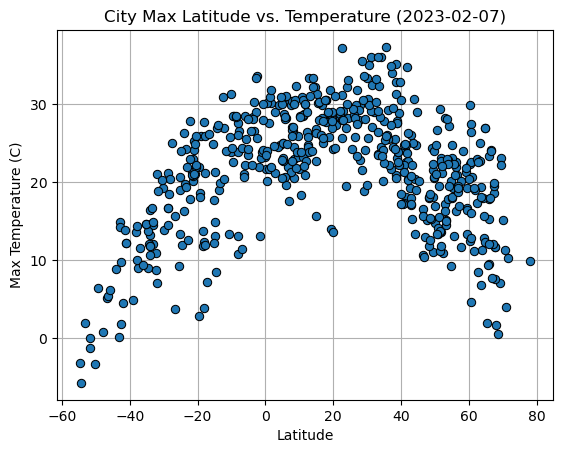

In [61]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

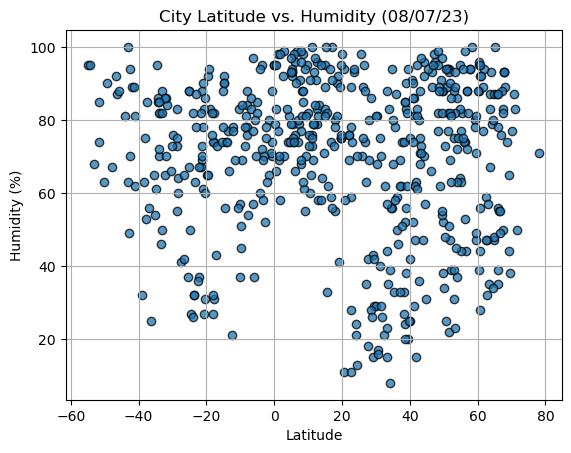

In [63]:


# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


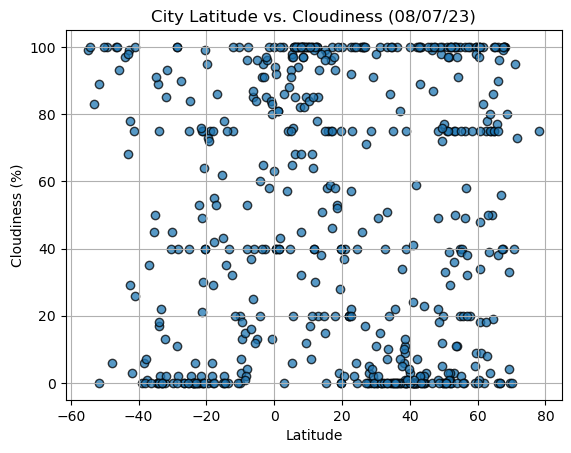

In [64]:


# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


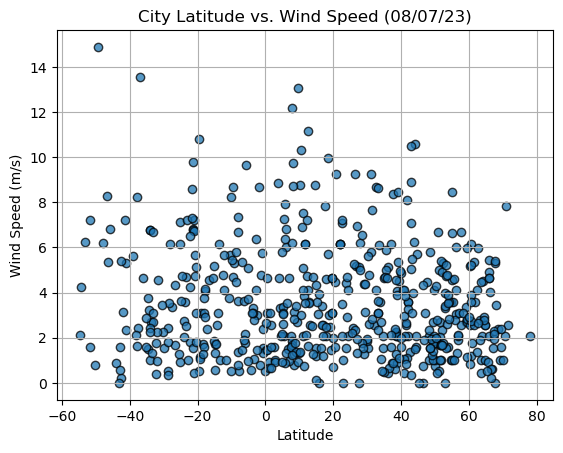

In [65]:

# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


In [66]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,patarra,9.8807,-84.0350,21.70,82,100,1.34,CR,1691379314
3,qaqortoq,60.7167,-46.0333,4.64,92,34,1.20,GL,1691379314
5,grafton,42.2070,-71.6856,20.40,83,0,3.60,US,1691379315
8,utrik,11.2278,169.8474,28.51,76,100,7.53,MH,1691379316
10,qorovulbozor,39.5006,64.7936,28.84,20,1,4.51,UZ,1691379317


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,6.47,90,100,14.88,TF,1691379314
2,puerto natales,-51.7236,-72.4875,-1.29,85,89,1.61,CL,1691379314
4,ushuaia,-54.8000,-68.3000,-3.16,95,99,2.14,AR,1691379315
6,papatowai,-46.5619,169.4708,5.11,92,100,8.27,NZ,1691379316
7,adamstown,-25.0660,-130.1015,20.70,67,40,7.11,PN,1691379316


The r-value is: 0.33592112715355443


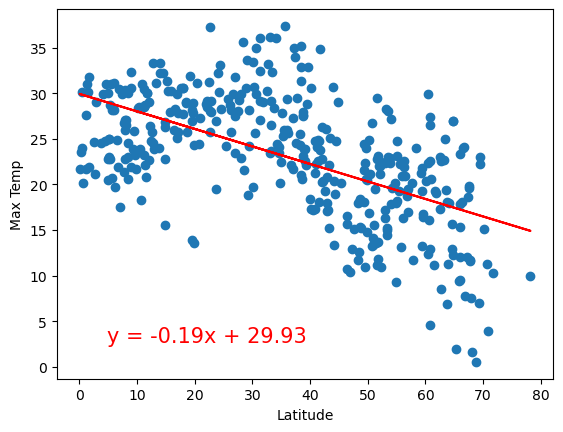

In [69]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-value is: 0.5733181464708779


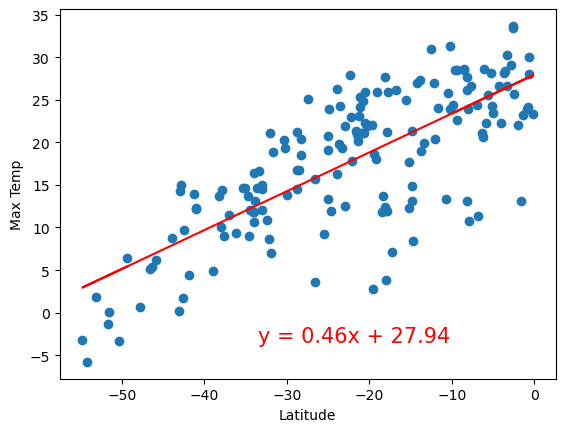

In [70]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.4, 0.1)

In [ ]:
#Discussion about the linear relationship:

#Northern Hemisphere:

#The relationship between latitude and max tempuratures displays a strong negative correlation.
#The r-value is ~ 0.34 (rounded up)
#Max temperature drops as the latitude increases.
#Southern Hemisphere:

#There is no correlation between latitude and max tempuratures
#The r-value is ~ 0.58 (rounded up)

The r-value is: 0.016826658657725178


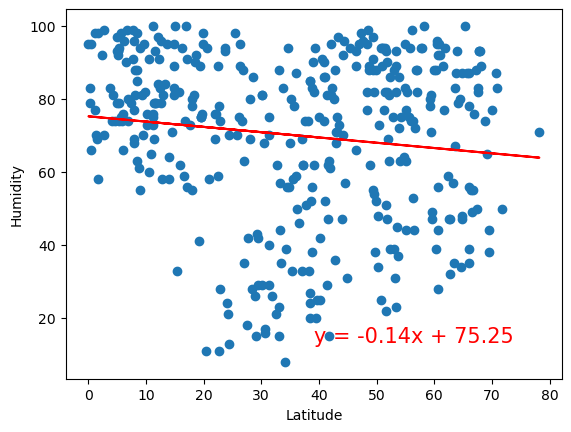

In [71]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

The r-value is: 0.002660958437617696


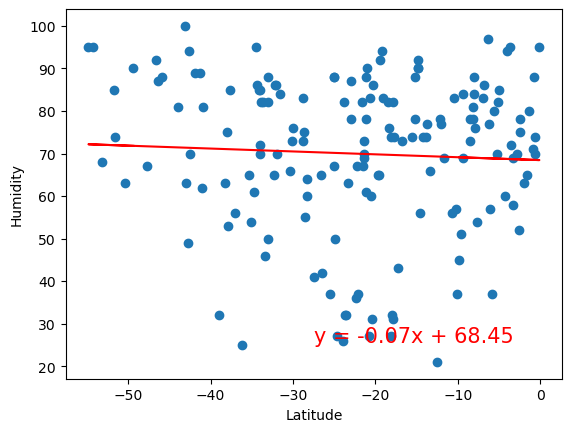

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

In [74]:
#Discussion about the linear relationship: Northern Hemisphere:

#There is no correlation between latitude and humidity
#The r-value is ~ 0.17 (rounded up)
#Southern Hemisphere:

#There is no correlation between latitude and humidity
#The r-value is ~ 0.002 (rounded up)

The r-value is: 0.027488273223375267


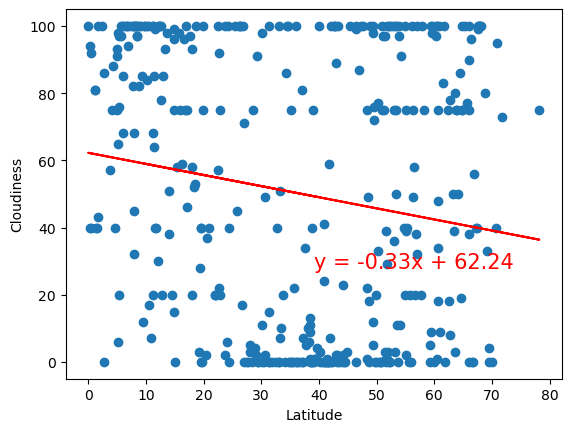

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.5, 0.3)

The r-value is: 4.203238274221472e-05


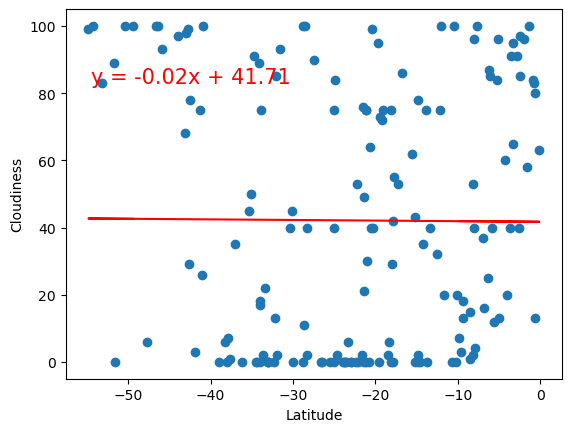

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.05, 0.8)

In [ ]:
#Discussion about the linear relationship:

#Northern Hemisphere:

#There is no correlation between Latitude and Cloudliness
#The r-value is ~ 0.02 (rounded up)
#Southern Hemisphere:

#There is no correlation between Latitude and Cloudliness
#The r-value is ~ 4.2 (rounded up)

The r-value is: 0.01764912231663705


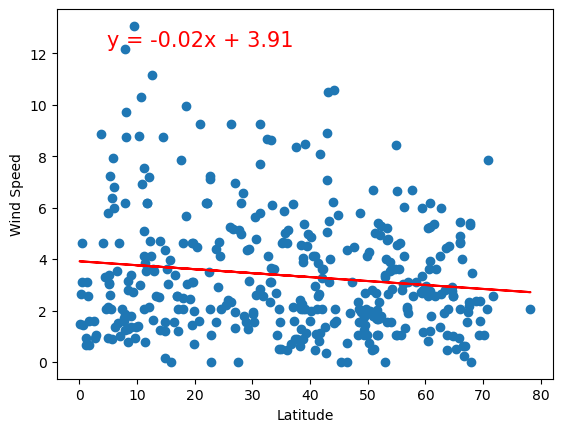

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

The r-value is: 0.0066148886909771255


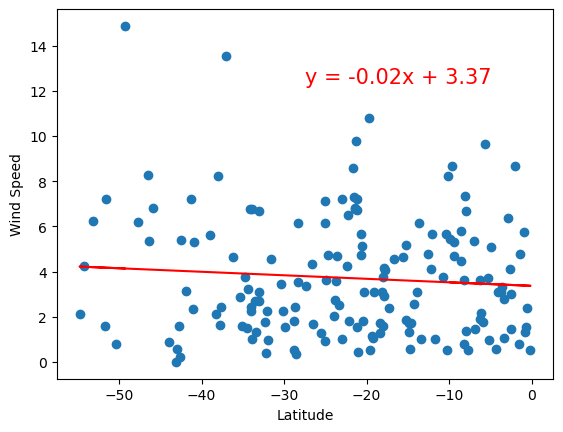

In [78]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 0.5, 0.8)